<a href="https://colab.research.google.com/github/joielee09/pythonserver/blob/master/cnnimageclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <b>3분 만에 전이 학습(Transfer Learning)을 활용한 인공지능 서비스 만들기</b>

* 본 프로젝트에서는 세 가지 기능을 합쳐서 순식간에 상용 인공지능 서비스를 제작합니다.
    1. 이미지 크롤링(image crawling) 혹은 크롤링 라이브러리
    2. 전이 학습(transfer learning)
    3. 웹 API 개발
* 이 프로젝트에서 만들어 볼 것은 <b>마동석/김종국/이병헌</b> 분류기(classifier)입니다.
* 단 <b>3분</b> 만에 인공지능 개발의 전체 과정을 진행합니다.
    * 데이터 수집/정제
    * 인공지능 모델 학습
    * 학습된 모델 배포
* 한글 폰트 설치 이후에 <b>[런타임] - [런타임 다시 시작]</b>을 수행해야 합니다.

In [ ]:
# 한글 폰트 설치하기 (꼭! 설치가 완료되면 [런타임 다시 시작]을 누르고 다시 실행하기)
!apt install fonts-nanum -y

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정하기
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
matplotlib.font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 13 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.1 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 149406 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
# 필요한 라이브러리 설치하기
!git clone https://github.com/ndb796/bing_image_downloader


Cloning into 'bing_image_downloader'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 86 (delta 38), reused 45 (delta 16), pack-reused 0
Unpacking objects: 100% (86/86), done.


#### <b>1. 이미지 크롤링을 활용한 학습 이미지 수집</b>

* 수집한 이미지를 저장하기 위한 폴더를 생성하고, 필요한 함수를 정의합니다.

In [ ]:
import os
import shutil
from bing_image_downloader.bing_image_downloader import downloader


directory_list = [
    './custom_dataset/train/',
    './custom_dataset/test/',
]

# 초기 디렉토리 만들기
for directory in directory_list:
    if not os.path.isdir(directory):
        os.makedirs(directory)

# 수집한 이미지를 학습 데이터와 평가 데이터로 구분하는 함수
def dataset_split(query, train_cnt):
    # 학습 및 평가 데이터셋 디렉토리 만들기
    for directory in directory_list:
        if not os.path.isdir(directory + '/' + query):
            os.makedirs(directory + '/' + query)
    # 학습 및 평가 데이터셋 준비하기
    cnt = 0
    for file_name in os.listdir(query):
        if cnt < train_cnt:
            print(f'[Train Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/train/' + query + '/' + file_name)
        else:
            print(f'[Test Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/test/' + query + '/' + file_name)
        cnt += 1
    shutil.rmtree(query)

* <b>마동석</b> 이미지 크롤링을 진행하고 데이터셋을 구축합니다.

In [ ]:
query = '마동석'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 40 Images on Page 1.
#1 이미지 다운로드 (http://img.tf.co.kr/article/home/2019/11/06/201922311573025989.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (http://image.newdaily.co.kr/site/data/img/2018/10/29/2018102900233_0.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://nsimg.kbs.co.kr/data/news/2017/09/06/3545042_KdD.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://image.chosun.com/sitedata/image/201710/09/2017100900592_0.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://image.ajunews.com/content/image/2015/09/12/20150912115518363692.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (http://cfile25.uf.tistory.com/image/25188D4B59429C401D1EBC)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (http://img.etoday.co.kr/pto_db/2018/04/20180402120558_1200699_600_818.jpg)
#7 파일 다운로드가 완료되었습니다.
#8 이미지 다운로드 (http://img.hankyung.com/photo/201905/2019051315144499235-540x778.jpg)
#8 파일 다운로드가 완료되었습니다.
#9 이미지 다운로드 (http://tenasia.hankyung.com/webwp_kr/wp-content/uploads/2019/05/2019050912182256062-540x360.jpg)
#

* <b>김종국</b> 이미지 크롤링을 진행하고 데이터셋을 구축합니다.

In [ ]:
query = '김종국'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 40 Images on Page 1.
#1 이미지 다운로드 (http://www.topstarnews.net/news/photo/first/201412/img_85925_1.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (http://tenasia.hankyung.com/webwp_kr/wp-content/uploads/2014/09/2014090116561616835-400x599.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://menu.mt.co.kr/moneyweek/thumb/2017/10/10/06/2017101014008037818_1.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://img.etoday.co.kr/pto_db/2017/10/20171010111502_1134785_600_818.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://image.chosun.com/sitedata/image/201902/21/2019022101115_0.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (http://image.tvdaily.co.kr/upimages/gisaimg/201905/1557709022_1456708.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (https://image.chosun.com/sitedata/image/201509/11/2015091100626_0.jpg)
#7 파일 다운로드가 완료되었습니다.
#8 이미지 다운로드 (http://storage.enuri.info/pic_upload/knowbox2/201912/12503251320191229c591c426-72a3-4a85-9bd3-e30fe5de3751.jpg)
#8 파일 다운로드가 완료되었습니다.
#9 이미지 다운로드 (http:/

* <b>이병헌</b> 이미지 크롤링을 진행하고 데이터셋을 구축합니다.

In [ ]:
query = '이병헌'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 40 Images on Page 1.
#1 이미지 다운로드 (http://photo.newsen.com/news_photo/2015/11/03/201511031149059610_1.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://newsimg.hankookilbo.com/cms/articlerelease/2016/01/25/201601251517155220_1.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://i.ytimg.com/vi/WEc1PY5JOl8/maxresdefault.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://img.mbn.co.kr/filewww/news/2012/08/23/13456891755.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (http://img.tf.co.kr/article/home/2018/08/01/20185399153308164000.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (http://img.wkorea.com/w/2020/06/style_5edf2a8a28946.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (https://i.ytimg.com/vi/h3-YY5sem54/maxresdefault.jpg)
#7 파일 다운로드가 완료되었습니다.
#8 이미지 다운로드 (http://newsimg.sedaily.com/2017/06/24/1OHBNKNIY1_1.jpg)
#8 파일 다운로드가 완료되었습니다.
#9 이미지 다운로드 (http://newsroom.etomato.com/userfiles/03-0432.jpg)
#9 파일 다운로드가 완료되었습니다.
#10 이미지 다운로드 (https://img.hankyung.com/photo/201911/BF.21014258.1.jpg

#### <b>2. PyTorch를 이용한 전이 학습(Transfer Learning)</b>

* 전이 학습(transfer learning)의 동작 과정을 간략화한 것은 다음과 같습니다.

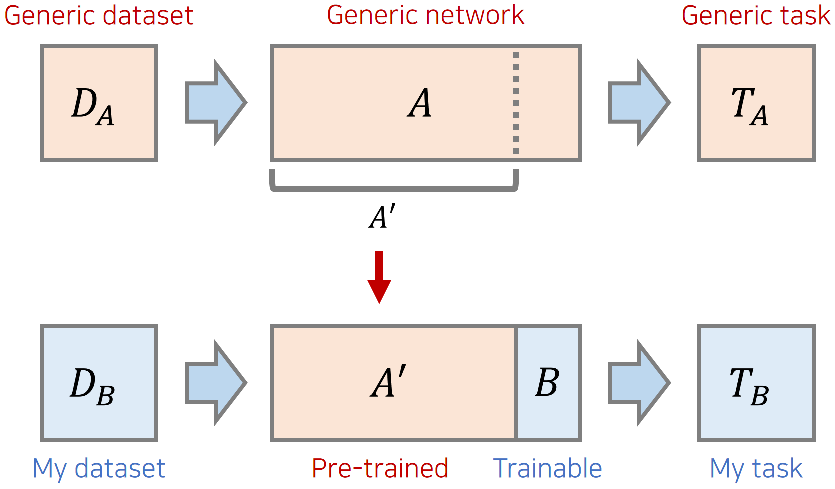

* 학습을 위해 필요한 라이브러리를 불러옵니다.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import time


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device 객체

* 데이터셋을 불러옵니다.

In [ ]:
# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(), # 데이터 증진(augmentation)
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

data_dir = './custom_dataset'
train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)

train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=4, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=4, shuffle=True, num_workers=4)

print('학습 데이터셋 크기:', len(train_datasets))
print('테스트 데이터셋 크기:', len(test_datasets))

class_names = train_datasets.classes
print('클래스:', class_names)

학습 데이터셋 크기: 90
테스트 데이터셋 크기: 30
클래스: ['김종국', '마동석', '이병헌']


* 간단히 이미지를 시각화해 봅시다.

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49437 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44608 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

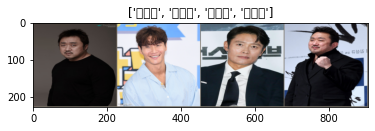

In [ ]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


# 학습 데이터를 배치 단위로 불러오기
iterator = iter(train_dataloader)

# 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

* 학습할 CNN 딥러닝 모델 객체를 초기화합니다.

In [ ]:
model = models.resnet34(pretrained=True)
num_features = model.fc.in_features
# 전이 학습(transfer learning): 모델의 출력 뉴런 수를 3개로 교체하여 마지막 레이어 다시 학습
model.fc = nn.Linear(num_features, 3)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


* 학습을 진행합니다.

In [ ]:
num_epochs = 50
model.train()
start_time = time.time()

# 전체 반복(epoch) 수 만큼 반복하며
for epoch in range(num_epochs):
    running_loss = 0.
    running_corrects = 0

    # 배치 단위로 학습 데이터 불러오기
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 모델에 입력(forward)하고 결과 계산
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # 역전파를 통해 기울기(gradient) 계산 및 학습 진행
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_datasets)
    epoch_acc = running_corrects / len(train_datasets) * 100.

    # 학습 과정 중에 결과 출력
    print('#{} Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))

#0 Loss: 1.0221 Acc: 48.8889% Time: 2.8552s
#1 Loss: 0.4820 Acc: 80.0000% Time: 5.8098s
#2 Loss: 0.4285 Acc: 85.5556% Time: 8.6969s
#3 Loss: 0.4217 Acc: 82.2222% Time: 11.6066s
#4 Loss: 0.3840 Acc: 86.6667% Time: 14.6293s
#5 Loss: 0.2856 Acc: 92.2222% Time: 17.6476s
#6 Loss: 0.2616 Acc: 92.2222% Time: 20.4968s
#7 Loss: 0.2091 Acc: 92.2222% Time: 23.4191s
#8 Loss: 0.3076 Acc: 87.7778% Time: 26.2820s
#9 Loss: 0.1190 Acc: 95.5556% Time: 29.1915s
#10 Loss: 0.1503 Acc: 95.5556% Time: 32.1441s
#11 Loss: 0.3702 Acc: 85.5556% Time: 35.0311s
#12 Loss: 0.4063 Acc: 87.7778% Time: 37.8940s
#13 Loss: 0.3493 Acc: 85.5556% Time: 40.8699s
#14 Loss: 0.2677 Acc: 91.1111% Time: 43.7758s
#15 Loss: 0.4998 Acc: 81.1111% Time: 46.6714s
#16 Loss: 0.4666 Acc: 84.4444% Time: 49.5665s
#17 Loss: 0.3277 Acc: 87.7778% Time: 52.4024s
#18 Loss: 0.3025 Acc: 88.8889% Time: 55.3229s
#19 Loss: 0.1743 Acc: 95.5556% Time: 58.1635s
#20 Loss: 0.1915 Acc: 96.6667% Time: 61.0353s
#21 Loss: 0.0809 Acc: 97.7778% Time: 63.8153s
#

* 학습된 모델을 평가합니다.

[예측 결과: 이병헌] (실제 정답: 이병헌)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48337 missing from current font.
  font.set_

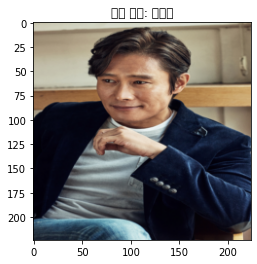

[예측 결과: 이병헌] (실제 정답: 이병헌)


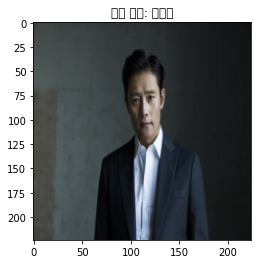

[예측 결과: 이병헌] (실제 정답: 이병헌)


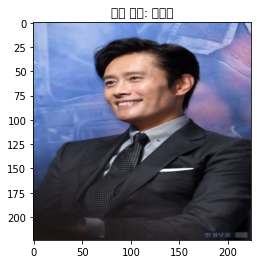

[예측 결과: 김종국] (실제 정답: 김종국)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44608 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44608 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text

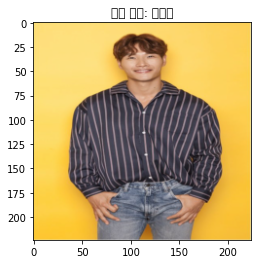

[예측 결과: 마동석] (실제 정답: 마동석)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49437 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49437 missing from current font.
  font.set_text

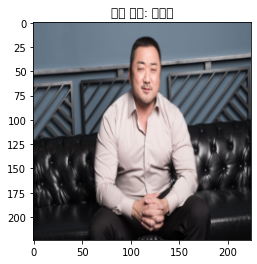

[예측 결과: 김종국] (실제 정답: 김종국)


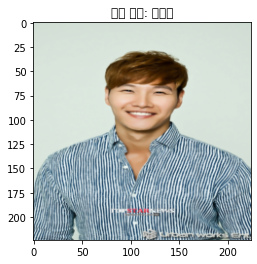

[예측 결과: 마동석] (실제 정답: 마동석)


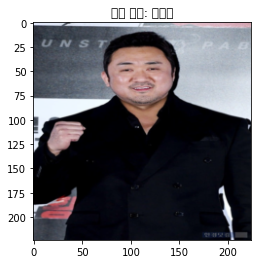

[예측 결과: 김종국] (실제 정답: 김종국)


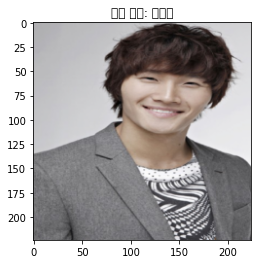

[Test Phase] Loss: 0.3641 Acc: 90.0000% Time: 2.4649s


In [ ]:
model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
        print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
        imshow(inputs.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))

#### <b>3. 분류 모델 API 개발</b>

* 학습된 분류 모델을 다른 사람이 사용할 수 있도록 API를 개발하여 배포합니다.
* 먼저 한 장의 이미지를 파일로부터 읽어와 분류 결과를 반환하는 기능을 작성합니다.

In [ ]:
# 테스트용 이미지 다운로드하기
!wget https://upload.wikimedia.org/wikipedia/commons/f/f1/Don_Lee_by_Gage_Skidmore.jpg -O test_image.jpg

--2021-03-01 04:38:18--  https://upload.wikimedia.org/wikipedia/commons/f/f1/Don_Lee_by_Gage_Skidmore.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4070584 (3.9M) [image/jpeg]
Saving to: ‘test_image.jpg’

test_image.jpg      100%[===================>]   3.88M  --.-KB/s    in 0.1s    

2021-03-01 04:38:18 (29.1 MB/s) - ‘test_image.jpg’ saved [4070584/4070584]



/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_

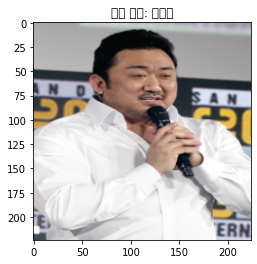

In [ ]:
from PIL import Image


image = Image.open('test_image.jpg')
image = transforms_test(image).unsqueeze(0).to(device)

with torch.no_grad():
    outputs = model(image)
    _, preds = torch.max(outputs, 1)
    imshow(image.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

* 웹 API 개방을 위해 <b>Ngrok</b> 서비스를 이용합니다.
* API 기능 제공을 위해 <b>Flask 프레임워크</b>를 사용합니다.

In [ ]:
# 필요한 라이브러리 설치하기
!pip install flask-ngrok

In [ ]:
! pip install flask-cors

In [ ]:
import io
from flask_ngrok import run_with_ngrok
from flask import Flask, jsonify, request
# from flask_cors import CORS
from flask_cors import CORS

app = Flask(__name__)
CORS(app)

# 이미지를 읽어 결과를 반환하는 함수
def get_prediction(image_bytes):
    
    image = Image.open(io.BytesIO(image_bytes))
    image = transforms_test(image).unsqueeze(0).to(device)
    print("image reached: ", image)
    
    with torch.no_grad():
        outputs = model(image)
        _, preds = torch.max(outputs, 1)
        imshow(image.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    return class_names[preds[0]]


@app.route('/', methods=['GET','POST'])
def predict():
    print("started predicting", request)
    # res.headers["Access-Control-Allow-Origin"] = "*"
    if request.method == 'POST':
        print("get post req", request)
        # 이미지 바이트 데이터 받아오기
        file = request.files['file']
        image_bytes = file.read()
        print("file: ",file)
        print("image_bytes: ", image_bytes)

        # 분류 결과 확인 및 클라이언트에게 결과 반환
        class_name = get_prediction(image_bytes=image_bytes)
        print("결과:", {'class_name': class_name})
        return jsonify({'class_name': class_name})

* API를 개방할 수 있으며 실행할 때마다 서버의 주소가 변경됩니다.
* 서버 주소를 정확히 확인할 필요가 있습니다.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://54b2b81557a1.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040
started predicting <Request 'http://54b2b81557a1.ngrok.io/' [POST]>
get post req <Request 'http://54b2b81557a1.ngrok.io/' [POST]>
file:  <FileStorage: 'aa.jpg' ('image/jpeg')>
image_bytes:  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x12\x12\x12\x15\x10\x10\x12\x15\x15\x15\x15\x15\x15\x17\x15\x15\x15\x15\x15\x15\x15\x16\x15\x15\x15\x16\x16\x15\x15\x16\x15\x18\x1d( \x18\x1a%\x1b\x15\x15!1!%)+...\x17\x1f383,7(-.+\x01\n\n\n\x0e\r\x0e\x15\x10\x10\x17+\x1d\x1d\x1d+-+++----+-----+-----------+---+-78-+---7-++++++++\xff\xc0\x00\x11\x08\x01\x03\x00\xc3\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x00\x07\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x03\x04\x05\x06\x07\x02\x08\xff\xc4\x009\x10\x00\x01\x03\x02\x04\x04\x04\x04\x05\x04\x02\x02\x03\x00\x00\x00\x01\x00\x02\x03\x04\x11\x05\x12!1\x06AQa\x13"q\x81\x072\x91\

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44608 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_

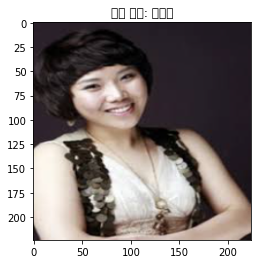

127.0.0.1 - - [01/Mar/2021 11:15:08] "POST / HTTP/1.1" 200 -


결과: {'class_name': '김종국'}


127.0.0.1 - - [01/Mar/2021 11:16:09] "POST / HTTP/1.1" 400 -


started predicting <Request 'http://54b2b81557a1.ngrok.io/' [POST]>
get post req <Request 'http://54b2b81557a1.ngrok.io/' [POST]>


[2021-03-01 11:16:18,312] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
127.0.0.1 - - [01/Mar/2021 11:16:18] "GET / HTTP/1.1" 500 -


started predicting <Request 'http://54b2b81557a1.ngrok.io/' [GET]>


127.0.0.1 - - [01/Mar/2021 11:16:18] "GET /favicon.ico HTTP/1.1" 404 -
[2021-03-01 11:18:09,772] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
127.0.0.1 - - [01/Mar/2021 11:18:09] "GET / HTTP/1.1" 500 -


started predicting <Request 'http://54b2b81557a1.ngrok.io/' [GET]>


127.0.0.1 - - [01/Mar/2021 11:18:59] "POST / HTTP/1.1" 400 -


started predicting <Request 'http://54b2b81557a1.ngrok.io/' [POST]>
get post req <Request 'http://54b2b81557a1.ngrok.io/' [POST]>
started predicting <Request 'http://54b2b81557a1.ngrok.io/' [POST]>
get post req <Request 'http://54b2b81557a1.ngrok.io/' [POST]>
file:  <FileStorage: 'aa.jpg' ('image/jpeg')>
image_bytes:  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x12\x12\x12\x15\x10\x10\x12\x15\x15\x15\x15\x15\x15\x17\x15\x15\x15\x15\x15\x15\x15\x16\x15\x15\x15\x16\x16\x15\x15\x16\x15\x18\x1d( \x18\x1a%\x1b\x15\x15!1!%)+...\x17\x1f383,7(-.+\x01\n\n\n\x0e\r\x0e\x15\x10\x10\x17+\x1d\x1d\x1d+-+++----+-----+-----------+---+-78-+---7-++++++++\xff\xc0\x00\x11\x08\x01\x03\x00\xc3\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x00\x07\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x03\x04\x05\x06\x07\x02\x08\xff\xc4\x009\x10\x00\x01\x03\x02\x04\x04\x04\x04\x05\x04\x02\x02\x03\x00\x00\x00\x01\x00\x02\x03\x04\x11\x

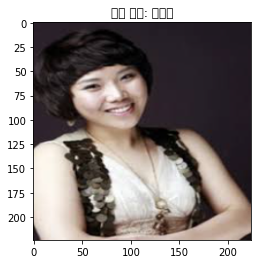

127.0.0.1 - - [01/Mar/2021 11:19:04] "POST / HTTP/1.1" 200 -


결과: {'class_name': '김종국'}


127.0.0.1 - - [01/Mar/2021 11:19:10] "POST / HTTP/1.1" 400 -


started predicting <Request 'http://54b2b81557a1.ngrok.io/' [POST]>
get post req <Request 'http://54b2b81557a1.ngrok.io/' [POST]>


[2021-03-01 11:19:28,101] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2098, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
127.0.0.1 - - [01/Mar/2021 11:19:28] "GET / HTTP/1.1" 500 -


started predicting <Request 'http://54b2b81557a1.ngrok.io/' [GET]>


In [ ]:
run_with_ngrok(app)
app.run()

* 클라이언트 테스트 방법

<pre>
curl -X POST -F file=@{이미지 파일명} {Ngrok 서버 주소}
</pre>

* 사용 예시

<pre>
curl -X POST -F file=@dongseok.jpg http://c4cdb8de3a35.ngrok.io/
</pre>

* 이러한 방식으로 웹, 모바일, 게임 등의 소프트웨어 환경에서 API를 호출하는 방식으로 인공지능 앱을 개발할 수 있습니다.

In [ ]:
import io
from flask_ngrok import run_with_ngrok
from flask import Flask, jsonify, request
# from flask_cors import CORS
from flask_cors import CORS
from flask import Flask
app = Flask (__name__)
 
@app.route('/')
def hello_world():
    return 'Hello, World!'
 
if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In [ ]:
run_with_ngrok(app)
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
